# K Mean Clustering - Crime Data

In [2]:
#import modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#load data crime data set and view it 
data=pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Min Max

In [8]:
from sklearn.preprocessing import MinMaxScaler


In [10]:
data=data.iloc[:,1:]


In [12]:
norm=MinMaxScaler()  


In [14]:
norm.fit(data)


MinMaxScaler()

In [16]:
norm_data = norm.transform(data)


In [18]:
#type
type(norm_data)

numpy.ndarray

In [20]:
#Kmean module from sklearn 
from sklearn.cluster import KMeans

In [22]:
#cdistance from scipy spatial distance
from scipy.spatial.distance import cdist

In [24]:
k_mean = list(range(2,15))

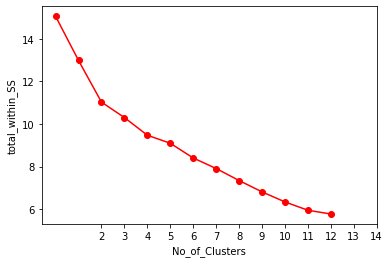

In [26]:
k_mean
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k_mean:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(norm_data)
    WSS = [] # variable for storing within sum of squares for each cluster  
    for j in range(i):
       j
       WSS.append(sum(cdist(norm_data[kmeans.labels_==j,:],
        kmeans.cluster_centers_[j].reshape(1,norm_data.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))    

plt.plot(TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")
plt.xticks(k_mean)
plt.show() 

###### now considering number of clusters =4 as analysed in the elbow plot



In [28]:
model = KMeans(n_clusters = 4)
model.fit(norm_data)

KMeans(n_clusters=4)

In [30]:
model.labels_
series_array=pd.Series(model.labels_)
data["clust"]=series_array

cluster1=data.iloc[:,1:4].groupby(data.clust).mean()

In [31]:
cluster1

,UrbanPop,Rape,clust
clust,,,
0,76.181818,34.345455,0
1,74.117647,19.905882,1
2,52.076923,12.176923,2
3,55.777778,20.788889,3
